<a href="https://colab.research.google.com/github/MatteoGhizzi/MLPNS2021/blob/main/LEZ19_NeuralNetwork_from0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
 X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])

In [3]:
X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [9]:
y = np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

In [13]:
def sigmoid(X):
  return 1. / (1 + np.exp(-X))

In [15]:
def loss(prediction):
  return y - prediction

In [7]:
# neuroni e layers

training = 6000

In [8]:
np.random.seed(1)

In [11]:
#define the derivative of the activation function
def dsigmoid(x):
  return x * (1 - x)

In [16]:
# sinapsi

# input 4X3 output 4X1
# allora la funzione deve essere 3X4
syn0 = 2*np.random.random((3,1)) - 1
for iter in range(training):

   # forward propagation step
    inputLayer = X
    #dot product
    l1 = np.dot(inputLayer, syn0)
    #activate
    output = sigmoid(l1)

    # how much did we miss by?
    output_error = loss(output)
    #back propagation step
    # multiply how much we missed by the
    # slope of the sigmoid at the values of L1  
    output_delta = output_error * dsigmoid(output)
    # how much did we miss?
 
    # update weights
    syn0 += np.dot(inputLayer.T, output_delta)
print ("Output After Training:\n", output)
print ("target: \n", y)

Output After Training:
 [[0.5]
 [0.5]
 [0.5]
 [0.5]]
target: 
 [[0]
 [1]
 [1]
 [0]]


In [17]:
# randomly initialize our weights with mean 0
syn0 = 2 * np.random.random((3, 4)) - 1
syn1 = 2 * np.random.random((4, 1)) - 1
print (syn0.shape, "\n", syn1.shape)

loss_hidden = []
loss_output = []

# 2 layers
for iterate in range(training):
  inputLayer = X  
  #dot product
  la1 = np.dot(inputLayer, syn0)
  #activate
  layer1out = sigmoid(la1)

  la2 = np.dot(layer1out, syn1)
  #activate
  outputLayer = sigmoid(la2)
  
  #calculate loss on the output layer
  outputLayer_error = loss(outputLayer)
  loss_output.append(outputLayer_error.sum())
  outputLayer_delta = outputLayer_error * dsigmoid(outputLayer)

  l1_error = outputLayer_delta.dot(syn1.T)
  loss_hidden.append(l1_error.sum())
  l1_delta = l1_error * dsigmoid(layer1out)
 
  # back propagation step
  # multiply how much we missed by the
  # slope of the sigmoid at the values in l1

  syn1 += outputLayer.T.dot(outputLayer_delta)
  syn0 += inputLayer.T.dot(l1_delta)
  
print ("Final Prediction:\n", outputLayer)

print ("target: \n", y)

(3, 4) 
 (4, 1)
Final Prediction:
 [[0.20121827]
 [0.71369819]
 [0.73741234]
 [0.54124884]]
target: 
 [[0]
 [1]
 [1]
 [0]]


In [19]:
import pylab as pl

Text(0, 0.5, 'loss')

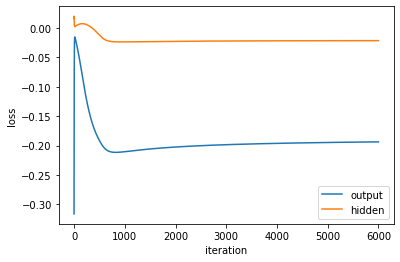

In [20]:
pl.plot(loss_output, label="output")
pl.plot(loss_hidden, label="hidden")
pl.legend()
pl.xlabel("iteration")
pl.ylabel("loss")